У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../../Data/mod 4/yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

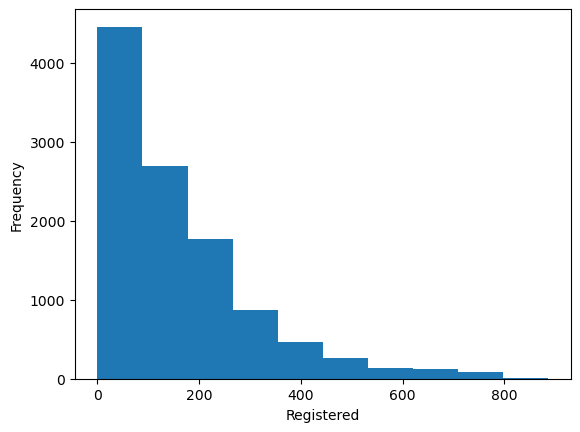

In [4]:
df.registered.plot.hist()
plt.xlabel('Registered');

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

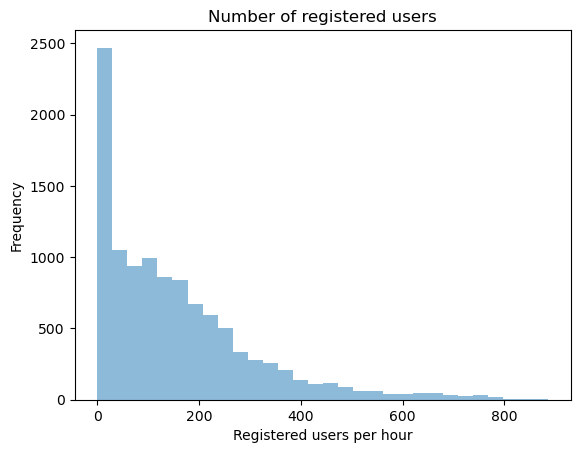

In [6]:
df.registered.plot.hist(bins = 30, alpha = 0.5)
plt.xlabel('Registered users per hour')
plt.ylabel('Frequency')
plt.title('Number of registered users');

The graph shows that most often, between 0 to 30 users register per hour. The rarest occurrence is when more than 600 users register in an hour. These data potentially indicate a modest level of internet traffic to the site. If the company aims to scale up, it would be sensible to consider paid traffic and SEO.

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [8]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [10]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [12]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [14]:
filter_0_users = df[df['registered'] == 0]
df_for_bar = filter_0_users.pivot_table(index='dayofweek', values='registered', aggfunc='count')
df_for_bar

,registered
dayofweek,
0,5
1,3
2,2
3,1
4,1
5,1
6,2


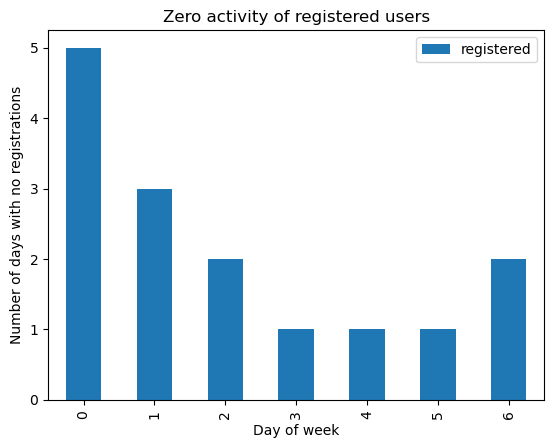

In [16]:
df_for_bar.plot.bar()
plt.xlabel('Day of week')
plt.ylabel('Number of days with no registrations')
plt.title('Zero activity of registered users');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [18]:
weather_reg_df = df.pivot_table(index='weather', values='registered', aggfunc='sum')
weather_reg_df

,registered
weather,
1,1186163
2,419914
3,87106
4,158


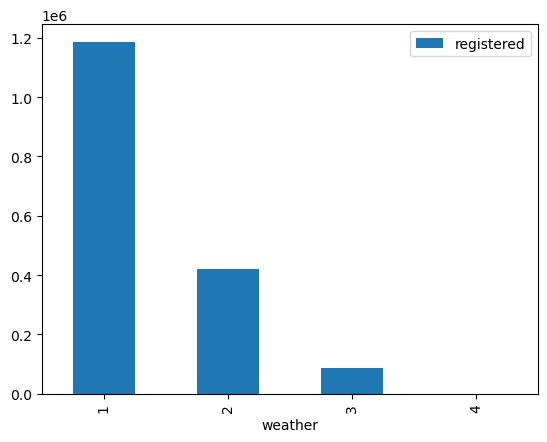

In [20]:
weather_reg_df.plot.bar();

In my opinion, this chart is not informative because the weather is grouped into overly broad categories. For instance, the chart shows that the highest number of registrations occurs under weather type number 1. Digging deeper, we find that this category includes "Clear," "Partly Cloudy," and "Mostly Cloudy." However, it is not possible to determine factors such as temperature, season, whether it is a weekend or a weekday, or the time of day. This chart does not clearly indicate whether there is a relationship between the number of registrations and the type of weather. Additionally, business owners cannot influence the weather.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

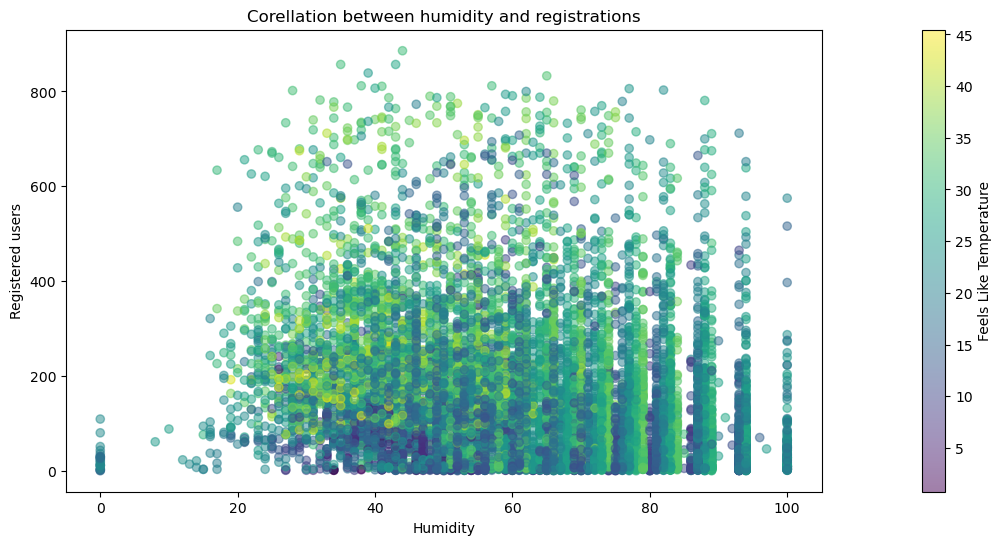

In [22]:
plt.figure(figsize=(13, 6))
hum_reg = plt.scatter(df.humidity, df.registered, alpha = .5, c=df.atemp,  cmap='viridis')
plt.xlabel('Humidity')
plt.ylabel('Registered users')
plt.title('Corellation between humidity and registrations')
cbar = plt.colorbar(hum_reg, pad=0.1)
cbar.set_label('Feels Like Temperature');

The highest number of registrations is observed in the humidity range from 30% to 80%. This indicates that registrations occur regardless of the humidity level. Objectively, such a graph is insufficient for drawing conclusions about the relationship between the number of registrations, humidity, and perceived temperature.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)